# Homework Assignment Number One

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns

## Section 1: Police killings

In [297]:
killings = pd.read_csv('../data/police-killings.csv', index_col=[0])
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 1. Make the following changes to column names:

- lawenforcementagency -> agency
- raceethnicity -> race

In [298]:
killings.rename(columns={'lawenforcementagency': 'agency'}, inplace=True)

In [299]:
killings.rename(columns={'raceethnicity': 'race'}, inplace=True)

In [300]:
killings.head()

,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### 2. Show the count of missing values in each column

In [301]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 3. Replace each null value in the dataframe with the string "unknown"

In [302]:
killings.fillna('unknown', inplace = True)

In [303]:
killings.isnull().sum()

name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

### 4. How many killings were there in March and April?

In [304]:
list = ['March']
list2 = ['April']

In [305]:
#number of killings is number of rows
killings[killings.month.isin(list)].shape

(114, 14)

In [306]:
killings[killings.month.isin(list2)].shape

(96, 14)

### 5. How many male and how many female victims are there?

In [307]:
gender_data = pd.melt(killings, value_vars=['gender'], 
                      var_name='sex', value_name='male or female?')

gender_data.groupby(by=['sex', 'male or female?'])['male or female?'].count()


sex     male or female?
gender  Female              22
        Male               445
Name: male or female?, dtype: int64

### 6. How many killings were of unarmed people?

In [308]:
armed_data = pd.melt(killings, value_vars=['armed'], 
                      var_name='question', value_name='armed or not?')

armed_data.groupby(by=['question', 'armed or not?'])['armed or not?'].count()

#answer is 102

question  armed or not?     
armed     Disputed                2
          Firearm               230
          Knife                  68
          No                    102
          Non-lethal firearm     14
          Other                  26
          Unknown                 7
          Vehicle                18
Name: armed or not?, dtype: int64

### 7. What percentage of all killings were unarmed?

In [309]:
killings.armed.value_counts(normalize=True)['No']*100

21.841541755888652

### 8. What are the 5 states with the most killings?

In [310]:
states_data = pd.melt(killings, value_vars=['state'], 
                      var_name='question', value_name='states_order')

grouped = states_data.groupby(by=['question', 'states_order'],)['states_order'].count()
grouped.sort_values(ascending=False).head()

question  states_order
state     CA              74
          TX              46
          FL              29
          AZ              25
          OK              22
Name: states_order, dtype: int64

### 9. Show a value counts of deaths for each race

In [311]:
race_data = pd.melt(killings, value_vars=['race'], 
                      var_name='question', value_name='race_deaths_count')

race_data.groupby(by=['question', 'race_deaths_count'],)['race_deaths_count'].count()

question  race_deaths_count     
race      Asian/Pacific Islander     10
          Black                     135
          Hispanic/Latino            67
          Native American             4
          Unknown                    15
          White                     236
Name: race_deaths_count, dtype: int64

### 10. Display a histogram of ages of all killings

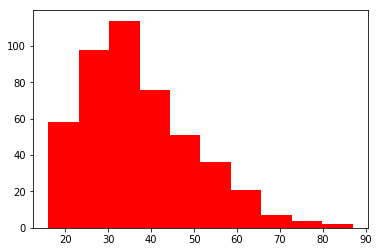

In [312]:
plt.hist(killings.age, color = 'red', label = 'deaths by age',)
plt.show()

### 11. Show histogram of ages for each race

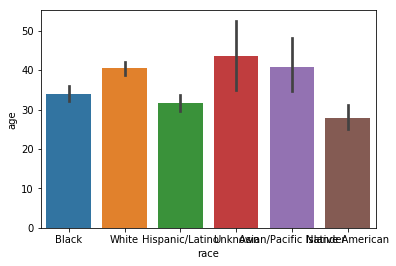

In [313]:
sns.barplot( x ="race", y = "age", data = killings)
plt.show()

### 12. What is the average age of death by race?

In [314]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

### 13. Show a bar chart with counts of deaths every month

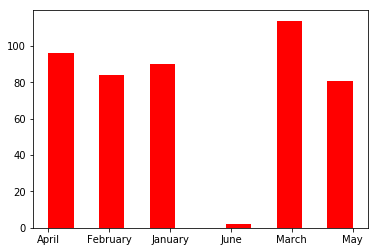

In [315]:
plt.hist(killings.month, bins = 12,  color = 'red', label = 'deaths by age', align=u'mid')
plt.show()

In [316]:
majors = pd.read_csv('../data/college-majors.csv', index_col=[0])
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


### 1. Delete the columns (employed_full_time_year_round, major_code)


In [317]:
majors.drop(majors.columns[0], axis=1, inplace=True)

In [318]:
majors.drop(majors.columns[3], axis=1, inplace=True)

In [319]:
majors.head()

,Major,Major_category,Total,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,74078,2423,0.026147,50000,34000,80000.0
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,64240,2266,0.028636,54000,36000,80000.0
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,22810,821,0.030248,63000,40000,98000.0
3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,64937,3619,0.042679,46000,30000,72000.0
4,FOOD SCIENCE,Agriculture & Natural Resources,24280,12722,894,0.049188,62000,38500,90000.0


### 2. Show the count of missing values in each column

In [320]:
majors.isnull().sum()

Major                            0
Major_category                   0
Total                            0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

### 3. What are the top 10 highest paying majors?

In [321]:
top_majors = majors.groupby('Major').mean().sort_values(by=['Total'], ascending = False).head(n=10)
top = top_majors.iloc[0:10, 0:1]
top

,Total
Major,
BUSINESS MANAGEMENT AND ADMINISTRATION,3123510
GENERAL BUSINESS,2148712
ACCOUNTING,1779219
NURSING,1769892
PSYCHOLOGY,1484075
ELEMENTARY EDUCATION,1446701
GENERAL EDUCATION,1438867
MARKETING AND MARKETING RESEARCH,1114624
ENGLISH LANGUAGE AND LITERATURE,1098647


In [322]:
top.reset_index(inplace = True)
top

,Major,Total
0,BUSINESS MANAGEMENT AND ADMINISTRATION,3123510
1,GENERAL BUSINESS,2148712
2,ACCOUNTING,1779219
3,NURSING,1769892
4,PSYCHOLOGY,1484075
5,ELEMENTARY EDUCATION,1446701
6,GENERAL EDUCATION,1438867
7,MARKETING AND MARKETING RESEARCH,1114624
8,ENGLISH LANGUAGE AND LITERATURE,1098647
9,COMMUNICATIONS,987676


### 4. Plot the data from the last question in a bar chart, include proper title, and labels


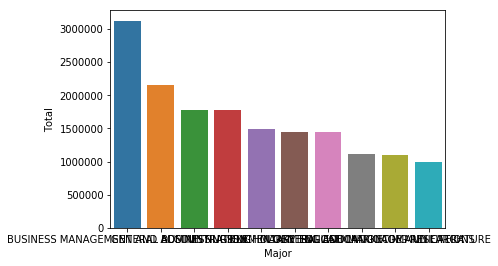

In [325]:
sns.barplot(x= "Major", y="Total", data = top)

### 5. What is the average median salary for each major category?

In [326]:
majors.groupby('Major_category').median().mean()

Total                            96453.093750
Employed_full_time_year_round    53598.031250
Unemployed                        4864.187500
Unemployment_rate                    0.059819
Median                           52331.250000
P25th                            35728.125000
P75th                            76875.000000
dtype: float64

### 6. Visualize only the top 5 paying major categories

In [327]:
top_major_cat = majors.groupby('Major_category').mean().sort_values(by=['Total'], ascending = False).head(n=10)
top_cat = top_major_cat.iloc[0:5, 0:1]
top_cat

,Total
Major_category,
Business,758364.692308
Communications & Journalism,450955.500000
Social Science,294902.777778
Education,293757.375000
Humanities & Liberal Arts,249222.333333


### 7. Plot a histogram of the distribution of median salaries

<function matplotlib.pyplot.show>

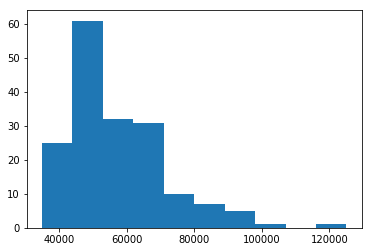

In [328]:
plt.hist("Median", data = majors)
plt.show

### 8. Plot a histogram of the distribution of median salaries by major category

In [335]:
med = majors[["Major_category", "Median"]]

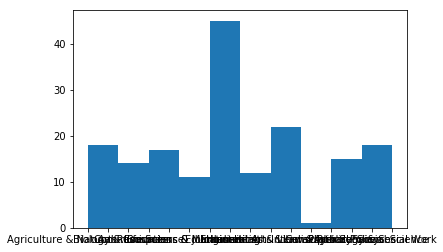

In [337]:
plt.hist("Major_category", data = med)
plt.show()

### 9. What are the top 10 most UNemployed majors?

In [166]:

top10_maj = majors.groupby('Major').mean().sort_values(by=['Unemployment_rate'], ascending = False).head(n=10)
top10_maj

,Total,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
Major,,,,,,,
MISCELLANEOUS FINE ARTS,8511,3802,1190,0.156147,45000,30000,60000.0
CLINICAL PSYCHOLOGY,7638,3297,587,0.102712,45000,26100,62000.0
MILITARY TECHNOLOGIES,4315,1708,187,0.101796,64000,39750,90000.0
SCHOOL STUDENT COUNSELING,2396,1093,169,0.101746,41000,33200,50000.0
LIBRARY SCIENCE,16193,4330,743,0.094843,40000,30000,55000.0
VISUAL AND PERFORMING ARTS,55141,23479,4297,0.094658,40000,27000,59000.0
COMPUTER PROGRAMMING AND DATA PROCESSING,29317,18747,2265,0.090264,60000,40000,85000.0
SOCIAL PSYCHOLOGY,10871,5226,660,0.087336,47000,35000,70000.0
ASTRONOMY AND ASTROPHYSICS,4700,2447,320,0.086022,80000,40000,106000.0


### 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category

In [167]:
top10_maj_cat = majors.groupby('Major_category').mean().sort_values(by=['Unemployment_rate'], ascending = False).head(n=10)
top10_maj_cat

,Total,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
Major_category,,,,,,,
Arts,225733.125000,106825.750000,13015.625000,0.087601,43525.000000,29112.500000,64500.000000
Psychology & Social Work,220808.666667,110365.444444,11578.444444,0.077867,44555.555556,31011.111111,64333.333333
Interdisciplinary,45199.000000,26038.000000,2990.000000,0.077269,43000.000000,32000.000000,55000.000000
Humanities & Liberal Arts,249222.333333,116233.866667,11942.400000,0.069429,46080.000000,31413.333333,70933.333333
Communications & Journalism,450955.500000,267046.750000,25299.750000,0.069125,49500.000000,34000.000000,76250.000000
Law & Public Policy,180585.200000,120090.800000,8609.800000,0.067854,52800.000000,36200.000000,78800.000000
Social Science,294902.777778,160037.555556,14683.333333,0.065686,53222.222222,37144.444444,81222.222222
Computers & Mathematics,161943.454545,106379.818182,7270.363636,0.059437,66272.727273,43427.272727,95818.181818
Industrial Arts & Consumer Services,147685.428571,77969.285714,5765.714286,0.058546,52642.857143,35064.285714,76857.142857


## Section 3: FIFA Soccer Game data

In [5]:
fifa = pd.read_csv('../data/fifa_data.csv')
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


### 1. Clean up the dataset.

    - Lowercase the column names
    - Set the "name" column as the index
    - Drop the following columns "national_position", "national_kit", "club_kit", "club_joining", and "contract_expiry"
    - Get rid of all players who are goalkeepers and drop every column that starts with GK
    - Drop every player whose rating is less than 70
    - Convert the "height" and "weight" columns to float types
    - Check to see if there any nulls, if so drop them from the dataset

In [6]:
fifa.columns = [x.lower() for x in fifa.columns]
fifa.head()


,name,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [7]:
fifa = fifa.set_index("name")
fifa.head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


In [8]:
fifa.drop(["national_position", "national_kit", "club_kit", "club_joining", "contract_expiry"], axis = 1)

,nationality,club,club_position,rating,height,weight,preffered_foot,birth_date,age,preffered_position,...,long_shots,curve,freekick_accuracy,penalties,volleys,gk_positioning,gk_diving,gk_kicking,gk_handling,gk_reflexes
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,Real Madrid,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,...,90,81,76,85,88,14,7,15,11,11
Lionel Messi,Argentina,FC Barcelona,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,...,88,89,90,74,85,14,6,15,11,8
Neymar,Brazil,FC Barcelona,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,...,77,79,84,81,83,15,9,15,9,11
Luis Suárez,Uruguay,FC Barcelona,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,...,86,86,84,85,88,33,27,31,25,37
Manuel Neuer,Germany,FC Bayern,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,...,16,14,11,47,11,91,89,95,90,89
De Gea,Spain,Manchester Utd,GK,90,193 cm,82 kg,Right,11/07/1990,26,GK,...,12,21,19,40,13,86,88,87,85,90
Robert Lewandowski,Poland,FC Bayern,ST,90,185 cm,79 kg,Right,08/21/1988,28,ST,...,82,77,76,81,86,8,15,12,6,10
Gareth Bale,Wales,Real Madrid,RW,90,183 cm,74 kg,Left,07/16/1989,27,RW,...,90,86,85,76,76,5,15,11,15,6
Zlatan Ibrahimović,Sweden,Manchester Utd,ST,90,195 cm,95 kg,Right,10/03/1981,35,ST,...,88,82,82,91,93,9,13,10,15,12


In [9]:
fifa.drop([col for col in fifa.columns if 'gk' in col],axis=1,inplace=True)
fifa.head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,69,77,87,94,86,86,84,85,88
Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,52,78,25,25,13,16,14,11,47,11


In [10]:
fifa = fifa[~fifa['national_position'].isin(['GK'])]
fifa.head()


,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,69,77,87,94,86,86,84,85,88
Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185 cm,...,78,84,85,86,91,82,77,76,81,86


In [11]:
fifa = fifa.drop(fifa[fifa.rating < 70])
fifa.head()


,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,69,77,87,94,86,86,84,85,88
Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185 cm,...,78,84,85,86,91,82,77,76,81,86


In [12]:
fifa['height'] = fifa['height'].str.replace(' cm', '')

In [13]:
fifa['weight'] = fifa['weight'].str.replace(' kg', '')

In [14]:
fifa['height'] = fifa.height.astype(float)
fifa['weight'] = fifa.weight.astype(float)

In [15]:
fifa.isnull().sum()

nationality               0
national_position     16513
national_kit          16513
club                      0
club_position             1
club_kit                  1
club_joining              1
contract_expiry           1
rating                    0
height                    0
weight                    0
preffered_foot            0
birth_date                0
age                       0
preffered_position        0
work_rate                 0
weak_foot                 0
skill_moves               0
ball_control              0
dribbling                 0
marking                   0
sliding_tackle            0
standing_tackle           0
aggression                0
reactions                 0
attacking_position        0
interceptions             0
vision                    0
composure                 0
crossing                  0
short_pass                0
long_pass                 0
acceleration              0
speed                     0
stamina                   0
strength            

In [16]:
fifa.dropna(inplace = True, how = 'any')
fifa.head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174.0,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,...,86,69,77,87,94,86,86,84,85,88
Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185.0,...,78,84,85,86,91,82,77,76,81,86


In [17]:
fifa.isnull().sum()

nationality           0
national_position     0
national_kit          0
club                  0
club_position         0
club_kit              0
club_joining          0
contract_expiry       0
rating                0
height                0
weight                0
preffered_foot        0
birth_date            0
age                   0
preffered_position    0
work_rate             0
weak_foot             0
skill_moves           0
ball_control          0
dribbling             0
marking               0
sliding_tackle        0
standing_tackle       0
aggression            0
reactions             0
attacking_position    0
interceptions         0
vision                0
composure             0
crossing              0
short_pass            0
long_pass             0
acceleration          0
speed                 0
stamina               0
strength              0
balance               0
agility               0
jumping               0
heading               0
shot_power            0
finishing       

### 2.  Who are the top five players of the following attributes: speed, marking, and finishing

In [18]:
fifa.sort_values("speed", ascending= False).head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183.0,...,77,85,86,91,87,90,86,85,76,76
Jürgen Damm,Mexico,Sub,6.0,Tigres,RM,25.0,06/10/2015,2022.0,74,187.0,...,83,68,65,68,60,55,66,59,61,51
Clinton Njie,Cameroon,Sub,7.0,Olym. Marseille,Sub,14.0,08/15/2015,2020.0,73,175.0,...,92,60,51,75,73,61,66,46,56,69
Oliver Burke,Scotland,Sub,17.0,RB Leipzig,Sub,19.0,08/29/2016,2021.0,70,188.0,...,77,50,44,70,67,53,62,38,42,48
Jhon Murillo,Venezuela,RM,14.0,Tondela,LW,15.0,07/01/2015,2020.0,72,171.0,...,92,69,58,70,71,70,69,38,66,52


In [19]:
fifa.sort_values("marking", ascending= False).head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Giorgio Chiellini,Italy,LCB,3.0,Juventus,LCB,3.0,07/01/2005,2018.0,88,187.0,...,59,89,80,78,33,49,60,31,50,45
Jérôme Boateng,Germany,RCB,17.0,FC Bayern,Sub,17.0,07/14/2011,2021.0,89,192.0,...,58,75,86,79,34,58,56,31,46,53
Andrea Barzagli,Italy,RCB,15.0,Juventus,Sub,15.0,01/01/2011,2018.0,86,187.0,...,59,85,76,54,27,39,50,31,60,35
Thiago Silva,Brazil,Sub,14.0,PSG,LCB,2.0,07/01/2012,2020.0,89,183.0,...,75,93,82,78,38,71,61,73,71,63
Miranda,Brazil,RCB,3.0,Inter,RCB,25.0,07/03/2015,2018.0,86,186.0,...,62,82,84,70,43,41,32,39,49,51


In [20]:
fifa.sort_values("finishing", ascending= False).head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,...,90,68,71,85,95,88,89,90,74,85
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,...,86,69,77,87,94,86,86,84,85,88
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,...,90,95,85,92,93,90,81,76,85,88
Gonzalo Higuaín,Argentina,Sub,9.0,Juventus,ST,9.0,07/26/2016,2021.0,89,184.0,...,75,77,80,86,92,80,74,62,70,88
Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185.0,...,78,84,85,86,91,82,77,76,81,86


### 3. Who is the tallest French lefted foot player?

In [21]:
french_players = fifa[fifa['nationality'].isin(['France'])]
french_players.head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Antoine Griezmann,France,CAM,7.0,Atlético Madrid,RS,7.0,07/29/2014,2021.0,88,176.0,...,90,87,80,81,88,82,84,75,71,87
Dimitri Payet,France,LM,8.0,Olym. Marseille,LW,11.0,01/29/2017,2021.0,85,175.0,...,80,48,59,78,76,83,90,91,76,79
Blaise Matuidi,France,LDM,14.0,PSG,LCM,14.0,07/01/2011,2018.0,85,175.0,...,77,83,73,74,65,66,65,52,56,72
Laurent Koscielny,France,RCB,21.0,Arsenal,LCB,6.0,07/07/2010,2020.0,85,186.0,...,70,86,84,54,32,47,22,49,51,35
N'Golo Kanté,France,RDM,13.0,Chelsea,RCM,7.0,07/16/2016,2021.0,83,168.0,...,80,79,54,72,65,66,49,49,54,56


In [22]:
french_players_left = french_players[french_players['preffered_foot'].isin(['Left'])]
french_players_left.head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Antoine Griezmann,France,CAM,7.0,Atlético Madrid,RS,7.0,07/29/2014,2021.0,88,176.0,...,90,87,80,81,88,82,84,75,71,87
Blaise Matuidi,France,LDM,14.0,PSG,LCM,14.0,07/01/2011,2018.0,85,175.0,...,77,83,73,74,65,66,65,52,56,72
Olivier Giroud,France,ST,9.0,Arsenal,Sub,12.0,06/26/2012,2020.0,83,192.0,...,59,82,88,84,84,76,70,65,81,82
Samuel Umtiti,France,LCB,22.0,FC Barcelona,CB,23.0,07/12/2016,2021.0,82,181.0,...,68,87,72,83,51,74,72,63,61,70
Ousmane Dembélé,France,RM,11.0,Bor. Dortmund,RW,7.0,07/01/2016,2021.0,81,178.0,...,87,59,43,73,77,65,74,65,70,70


In [23]:
french_players_left.sort_values("height", ascending= False).head(n=1)

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Olivier Giroud,France,ST,9.0,Arsenal,Sub,12.0,06/26/2012,2020.0,83,192.0,...,59,82,88,84,84,76,70,65,81,82


### 4. Show a pandas series of every attribute's correlation with the rating attribute

In [24]:
corr = fifa.corr()
corr["rating"]

national_kit         -0.047044
club_kit             -0.505658
contract_expiry      -0.099413
rating                1.000000
height                0.034715
weight                0.075370
age                   0.150704
weak_foot             0.218422
skill_moves           0.285634
ball_control          0.461191
dribbling             0.395672
marking               0.119945
sliding_tackle        0.148555
standing_tackle       0.174721
aggression            0.324563
reactions             0.867879
attacking_position    0.355279
interceptions         0.211111
vision                0.538736
composure             0.654049
crossing              0.359034
short_pass            0.497926
long_pass             0.475106
acceleration          0.241005
speed                 0.262940
stamina               0.318192
strength              0.304305
balance               0.134069
agility               0.315347
jumping               0.290215
heading               0.301231
shot_power            0.423771
finishin

### 5. Make a heatmap of the dataset's correlation table

In [25]:
sns.heatmap(fifa)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### 6. Return a dataframe with only players from the following clubs. Call the dataframe fifa2. From now on we'll be using fifa2

In [252]:
clubs_list = ['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma']

In [253]:
fifa2 = fifa[fifa['club'].isin(['Real Madrid', 'FC Barcelona', 'FC Bayern', 'Manchester Utd',
       'Chelsea', 'Arsenal', 'Juventus', 'PSG', 'Manchester City',
              'Bor. Dortmund', 'Liverpool', 'Roma'])]
fifa2.head()

,nationality,national_position,national_kit,club,club_position,club_kit,club_joining,contract_expiry,rating,height,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,...,90,95,85,92,93,90,81,76,85,88
Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,...,90,68,71,85,95,88,89,90,74,85
Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174.0,...,96,61,62,78,89,77,79,84,81,83
Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,...,86,69,77,87,94,86,86,84,85,88
Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185.0,...,78,84,85,86,91,82,77,76,81,86


### 7. Make a bar plot of the average long_shots, curve, and dribbling attributes of the clubs in the data

In [254]:
fifa_club = fifa2.groupby("club").mean()
fifa_club.head()

,national_kit,club_kit,contract_expiry,rating,height,weight,age,weak_foot,skill_moves,ball_control,...,agility,jumping,heading,shot_power,finishing,long_shots,curve,freekick_accuracy,penalties,volleys
club,,,,,,,,,,,,,,,,,,,,,
Arsenal,12.000000,16.100000,2019.300000,83.000000,181.300000,75.300000,26.900000,3.100000,2.900000,79.400000,...,72.600000,70.500000,66.000000,74.600000,62.000000,69.500000,65.700000,63.100000,65.600000,61.100000
Bor. Dortmund,13.750000,23.125000,2019.875000,81.125000,181.000000,74.500000,24.000000,3.375000,2.875000,69.250000,...,75.000000,72.000000,55.500000,67.875000,57.875000,56.625000,58.750000,51.000000,52.250000,58.875000
Chelsea,12.625000,18.000000,2019.875000,84.000000,178.375000,75.375000,27.250000,3.750000,3.250000,80.125000,...,77.750000,69.125000,63.625000,73.875000,72.000000,71.875000,66.125000,57.500000,66.000000,65.125000
FC Barcelona,12.846154,11.000000,2019.923077,86.230769,180.076923,76.769231,27.769231,3.615385,2.923077,76.153846,...,72.153846,71.153846,60.000000,67.000000,61.846154,61.538462,66.230769,59.230769,61.076923,60.615385
FC Bayern,10.500000,17.333333,2020.250000,85.416667,181.666667,76.916667,26.416667,3.500000,3.166667,81.166667,...,76.833333,75.500000,73.833333,80.416667,68.166667,75.000000,73.250000,65.166667,67.916667,72.250000


In [255]:
fifa_club.columns

Index([u'national_kit', u'club_kit', u'contract_expiry', u'rating', u'height',
       u'weight', u'age', u'weak_foot', u'skill_moves', u'ball_control',
       u'dribbling', u'marking', u'sliding_tackle', u'standing_tackle',
       u'aggression', u'reactions', u'attacking_position', u'interceptions',
       u'vision', u'composure', u'crossing', u'short_pass', u'long_pass',
       u'acceleration', u'speed', u'stamina', u'strength', u'balance',
       u'agility', u'jumping', u'heading', u'shot_power', u'finishing',
       u'long_shots', u'curve', u'freekick_accuracy', u'penalties',
       u'volleys'],
      dtype='object')

In [256]:
atts = fifa_club[["long_shots", "curve", "dribbling"]]
atts.reset_index(inplace= True)

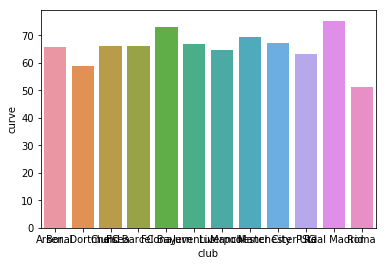

In [257]:
sns.barplot(x = "club", y= "curve",data = atts)
plt.show()

### 8. Make a scatter plot of short_pass vs marking and use the preffered_foot column to color-encode the dots.

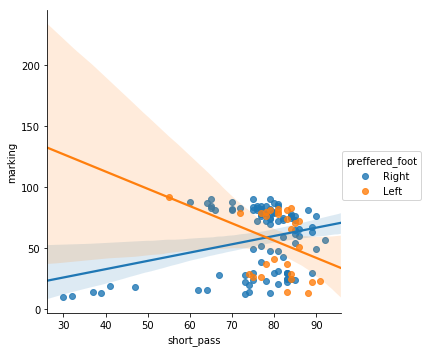

In [258]:
sns.lmplot(x = "short_pass", y="marking", hue = "preffered_foot", data = fifa2)

### 9. Make a grouped boxplots using club_position as the x axis for the following attributes: dribbling, balance, and sliding_tackle

In [259]:
#Dribbling boxplot

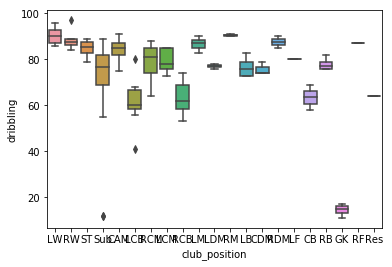

In [260]:
sns.boxplot(x = "club_position", y="dribbling", data = fifa2)

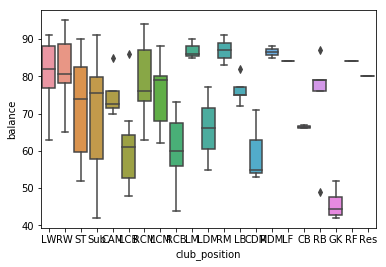

In [268]:
figsize = (20, 15)
sns.boxplot(x = "club_position", y="balance", data = fifa2)

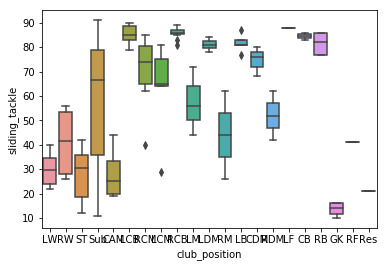

In [269]:
sns.boxplot(x = "club_position", y="sliding_tackle", data = fifa2)

Which position is better at dribbling? ST or RCM? Why?

In [295]:
drib = fifa2[['club_position', 'dribbling']]
bal.groupby('club_position').mean() ##RCM because the mean is higher.

,balance
club_position,
CAM,75.000000
CB,66.500000
CDM,59.666667
GK,45.750000
LB,76.200000
LCB,61.000000
LCM,75.400000
LDM,66.000000
LF,84.000000


In [265]:
#Balance boxplot

Which position is better at balance? LM or LDM? Why?

In [291]:
bal = fifa2[['club_position', 'balance']]




In [293]:
bal.groupby('club_position').mean()

,balance
club_position,
CAM,75.000000
CB,66.500000
CDM,59.666667
GK,45.750000
LB,76.200000
LCB,61.000000
LCM,75.400000
LDM,66.000000
LF,84.000000


In [ ]:
##LM because the mean is higher

In [ ]:
#sliding_tackle boxplot

What is the IQR for positions ST, RB, and RM?